In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import RegularGridInterpolator
import scipy.integrate as integrate
import h5py
import pickle
import constants as cst

import sys
import os
import subprocess
from copy import copy
import matplotlib.colors as colors
from mpl_toolkits.mplot3d import Axes3D

#%matplotlib notebook

import Reading_Scripts as Reading
import kgrid as kgrid
import Photo_Emission as Photo
import Incoherent_Photo_Emission as Incoherent


np.set_printoptions(threshold=np.inf)

In [2]:
system="BlackP"
out_path = "./../../OUT/"
path = "./../../DATA/data_excitons/"+system+"/"

In [3]:
nkx=72
nky=72
nkz=72


#name_Exciton_energy = str(nkx)+'x'+str(nky)+'x'+str(nkz)+'.log'

#result = subprocess.run(['bash','./log_Hqpgw_new/read.sh', './log_Hqpgw_new/'+name_Exciton_energy, 'E(1)', "1"],capture_output=True,text=True)
#E_exciton = float(result.stdout.strip())

fname = path + "BlackP_grid_nk"+str(nkx)+"x"+str(nky)+"x"+str(nkz)+"_wann_calc.h5"
Energies = Reading.ReadBands(fname)
#Energie_Valence = np.reshape(Energies[:,19],[nkx,nky,nkz])
Energie_no_Valence  = Energies[:,18]
Energie_Valence     = Energies[:,19]
Energie_Conduction  = Energies[:,20]



##estos archivos se deben mover a la carpeta de outputs al final del dia
fname="./out_Hqpgw_new/"+str(nkx)+"x"+str(nky)+"x"+str(nkz)+"_exc.h5"
ϵ,ϕ_real,ϕ_imag =Reading.Read_Eigen_states(fname)

fname="./out_Hqpgw_new/"+str(nkx)+"x"+str(nky)+"x"+str(nkz)+"_exc_dens.h5"

ψ = Reading.Read_Density(fname)

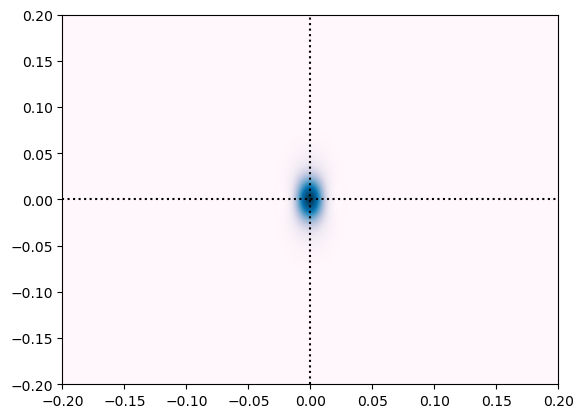

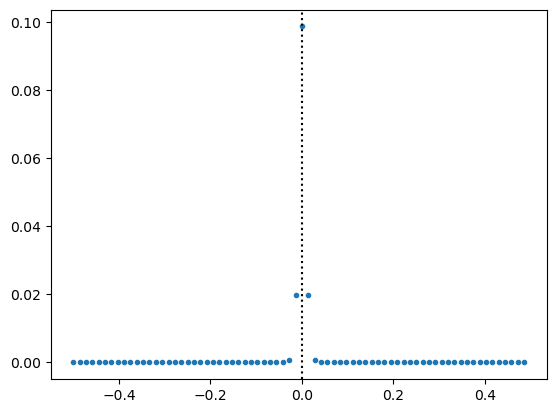

In [6]:
x1 = np.linspace(-0.5,0.5, nkx+1)[0:-1]

fig, ax1 = plt.subplots()

a = ax1.imshow(np.reshape(ψ[0,:], [nkx,nky,nkz])[:,:,int(nkz/2)],\
               extent=[x1.min(),x1.max(),x1.min(),x1.max()],
           origin='lower',aspect='auto',interpolation ='spline36',cmap = 'PuBu')

ax1.axvline(x=0,color='black',linestyle=':')
ax1.axhline(y=0,color='black',linestyle=':')

plt.xlim(-0.2,0.2)
plt.ylim(-0.2,0.2)

plt.show()

plt.figure()

plt.plot(x1,np.reshape(ψ[0,:], [nkx,nky,nkz])[int(nkx/2),:,int(nkz/2)],'.')
plt.axvline(x=0.0,color='black',linestyle=':')
#plt.xlim(-0.05,0.05)




In [26]:
Q=0.0556
direccion = 'kz'
ϵ_plus,ψ_plus,ϵ_minus,ψ_minus = Incoherent.Reading_Data(Q,direccion,retorno=5)

nkx=72
nky=72
nkz=72

x1 = np.linspace(-0.5,0.5, nkx+1)[0:-1]
x1_interp = np.linspace(-0.5,0.5, 256+1)[0:-1]

signo ='minus'

if signo == 'plus':
    ψ = ψ_plus
    Qd = -Q

if signo == 'minus':
    ψ = ψ_minus
    Qd = Q


np.where(np.reshape(ψ[0,:], [nkx,nky,nkz])==np.max(np.reshape(ψ[0,:], [nkx,nky,nkz])))


(array([38]), array([36]), array([36]))

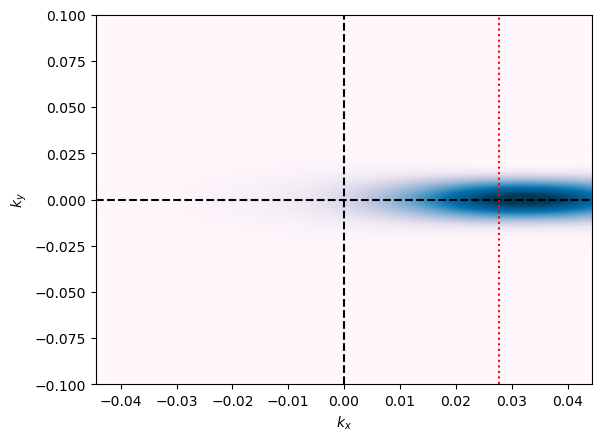

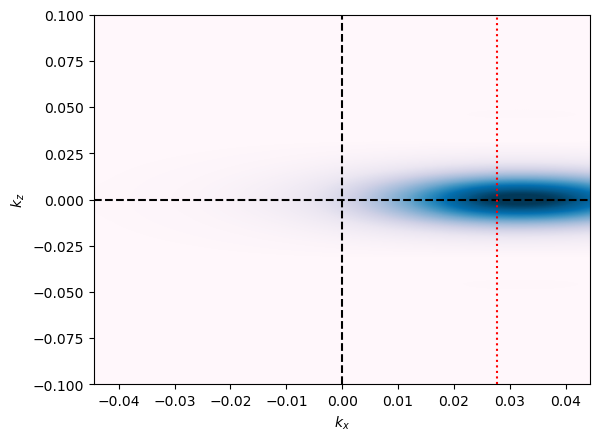

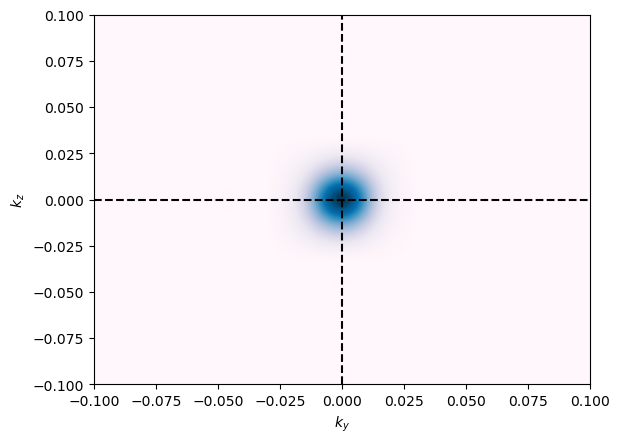

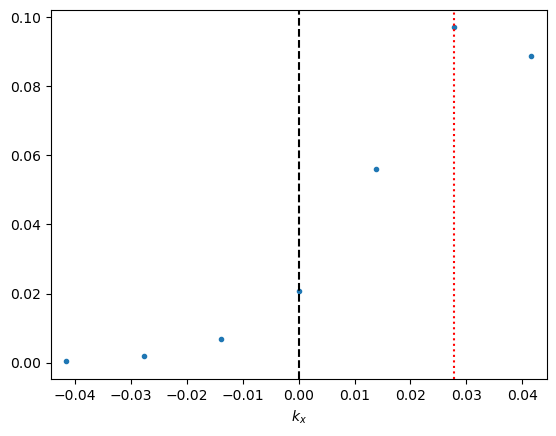

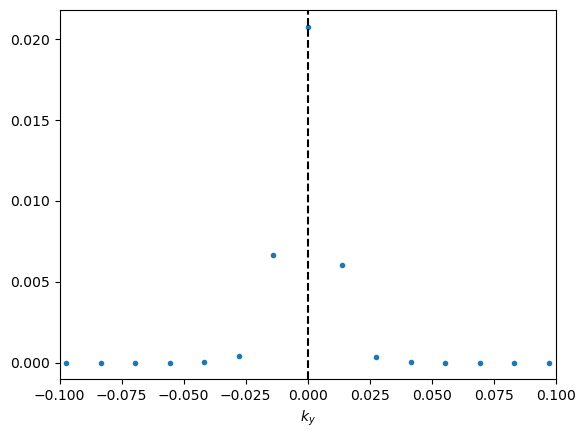

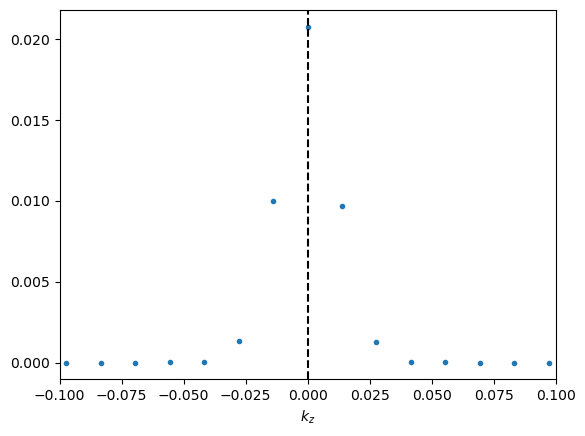

In [27]:
Incoherent.Plotting_Exitonic_Density(x1,nkx,nky,nkz,ψ,Qd,direccion)

[ 0.09655844 -0.01858165  0.        ]
[ 0.09568834 -0.01852487 -0.01598555 -1.00941456]
[0.09727715 0.01850872 0.01633471 0.05050051]
[ 0.09973796 -0.01835934 -0.03286358  0.15069993]
[ 0.09982672  0.01832651  0.03284623 -0.10907792]
[ 0.10616146 -0.01787354 -0.06630347  0.08067059]
[ 0.06185976  0.01797529  0.06418799 10.8730747 ]
[ 0.11065201 -0.01771408 -0.13737096  0.20062337]
[ 0.10957534  0.01773271  0.13738443 -0.14224932]


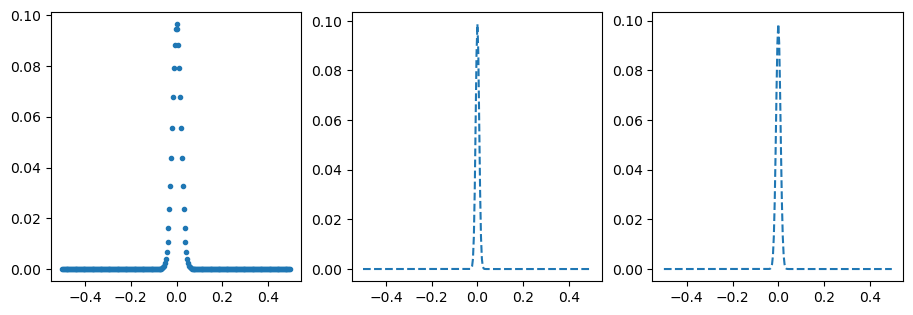

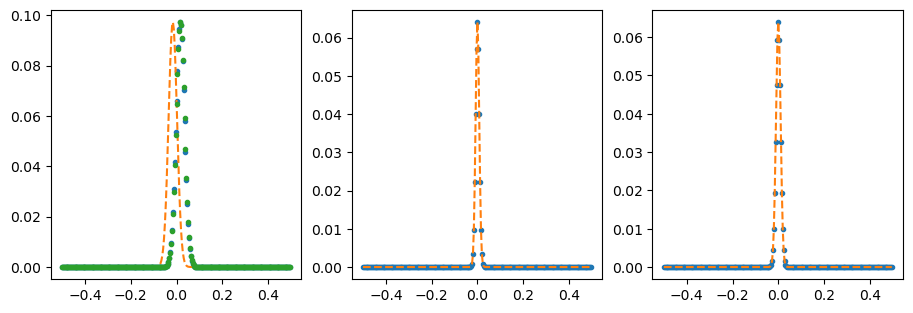

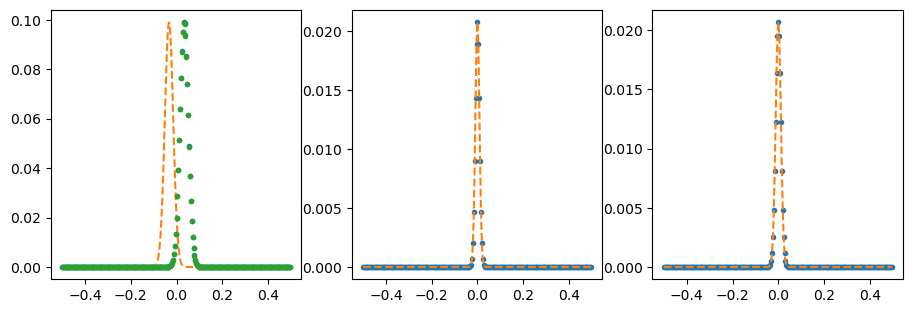

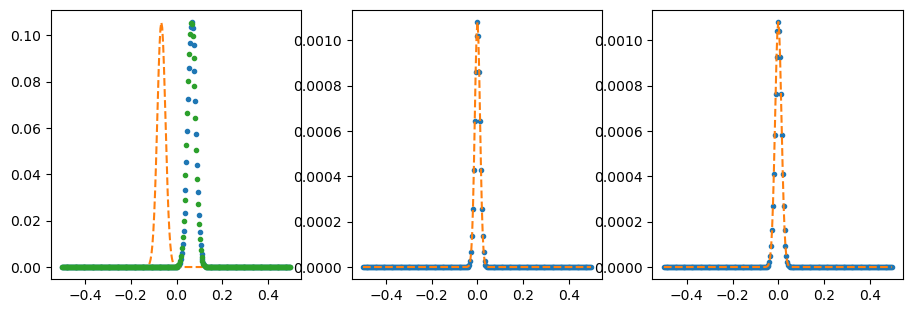

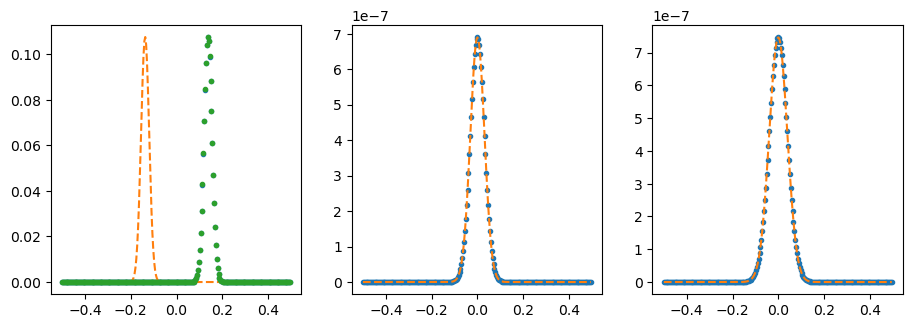

In [7]:
#
#Q=0.2224
direccion = 'kz'
nkx=72
nky=72
nkz=72
x1 = np.linspace(-0.5,0.5, nkx+1)[0:-1]
x1_interp = np.linspace(-0.5,0.5, 256+1)[0:-1]

Q_grid =[0.0278,0.0556,0.1112,0.2224]

Cx  = np.zeros((len(Q_grid)*2 +1))  
Σx  = np.zeros((len(Q_grid)*2 +1))  
X0x = np.zeros((len(Q_grid)*2 +1))  
Ax  = np.zeros((len(Q_grid)*2 +1))  

Cy  = np.zeros((len(Q_grid)*2 +1))  
Σy  = np.zeros((len(Q_grid)*2 +1))  
X0y = np.zeros((len(Q_grid)*2 +1))  
Ay  = np.zeros((len(Q_grid)*2 +1))  

Cz  = np.zeros((len(Q_grid)*2 +1))  
Σz  = np.zeros((len(Q_grid)*2 +1))  
X0z = np.zeros((len(Q_grid)*2 +1))  
Az  = np.zeros((len(Q_grid)*2 +1))  

Q_grid = list([0.0])+list(Q_grid)

for count,QQ in enumerate(Q_grid):
    
    if count == 0:
        ϵ_plus,ψ_plus = Incoherent.Reading_Data(QQ,direccion,retorno=8)
        
        poptx_plus,popty_plus,poptz_plus    = Incoherent.Fitting_Parameters(x1,nkx,nky,nkz,ψ_plus ,False,-QQ)
        
        print(poptx_plus)
        
        Cx[len(Q_grid)-1] =  poptx_plus[0]
        Cy[len(Q_grid)-1] =  popty_plus[0]
        Cz[len(Q_grid)-1] =  poptz_plus[0]

        Σx[len(Q_grid)-1] =  abs(poptx_plus[1])
        Σy[len(Q_grid)-1] =  abs(popty_plus[1])
        Σz[len(Q_grid)-1] =  abs(poptz_plus[1])
        

        X0x[len(Q_grid)-1] =  poptx_plus[2]
        X0y[len(Q_grid)-1] =  popty_plus[2]
        X0z[len(Q_grid)-1] =  poptz_plus[2]
        
        fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(11, 3.5))    

        #ax1.plot(x1_interp,Incoherent.func_q_nq_0(x1_interp, *poptx_minus),'.')
        ax1.plot(x1_interp,Incoherent.func_q_eq_0(x1_interp, *poptx_plus),'.')
        #ax1.plot(x1,np.reshape(ψ_minus[0,:], [nkx,nky,nkz])[:,int(nky/2),int(nkz/2)],':')
        #ax1.plot(x1,np.reshape(ψ_plus[0,:], [nkx,nky,nkz])[:,int(nky/2),int(nkz/2)],'--')

        #ax2.plot(x1_interp,Incoherent.func_q_eq_0(x1_interp, *popty_minus),'.')
        ax2.plot(x1_interp,Incoherent.func_q_eq_0(x1_interp, *popty_plus),'--')
        #ax2.plot(x1,np.reshape(ψ_minus[0,:], [nkx,nky,nkz])[int(nkx/2),:,int(nkz/2)],'--')
        #ax2.plot(x1,np.reshape(ψ_plus[0,:], [nkx,nky,nkz])[int(nkx/2),:,int(nkz/2)],'--')

        #ax3.plot(x1_interp,Incoherent.func_q_eq_0(x1_interp, *poptz_minus),'.')
        ax3.plot(x1_interp,Incoherent.func_q_eq_0(x1_interp, *poptz_plus),'--')
        #ax3.plot(x1,np.reshape(ψ_minus[0,:], [nkx,nky,nkz])[int(nkx/2),int(nky/2),:],'--')
        #ax3.plot(x1,np.reshape(ψ_plus[0,:], [nkx,nky,nkz])[int(nkx/2),int(nky/2),:],'--')
        
        
    if count != 0:
    
        ϵ_plus,ψ_plus,ϵ_minus,ψ_minus = Incoherent.Reading_Data(QQ,direccion,retorno=5)

        poptx_minus,popty_minus,poptz_minus = Incoherent.Fitting_Parameters(x1,nkx,nky,nkz,ψ_minus,direccion,QQ)
        poptx_plus,popty_plus,poptz_plus    = Incoherent.Fitting_Parameters(x1,nkx,nky,nkz,ψ_plus ,direccion,-QQ)

        print(poptx_plus)
        print(poptx_minus)

        Cx[len(Q_grid)-1-count] =  poptx_minus[0]
        Cy[len(Q_grid)-1-count] =  popty_minus[0]
        Cz[len(Q_grid)-1-count] =  poptz_minus[0]
        Cx[len(Q_grid)-1+count] =  poptx_plus[0]
        Cy[len(Q_grid)-1+count] =  popty_plus[0]
        Cz[len(Q_grid)-1+count] =  poptz_plus[0]

        Σx[len(Q_grid)-1-count] =  abs(poptx_minus[1])
        Σy[len(Q_grid)-1-count] =  abs(popty_minus[1])
        Σz[len(Q_grid)-1-count] =  abs(poptz_minus[1])
        Σx[len(Q_grid)-1+count] =  abs(poptx_plus[1])
        Σy[len(Q_grid)-1+count] =  abs(popty_plus[1])
        Σz[len(Q_grid)-1+count] =  abs(poptz_plus[1])

        X0x[len(Q_grid)-1-count] =  poptx_minus[2]
        X0y[len(Q_grid)-1-count] =  popty_minus[2]
        X0z[len(Q_grid)-1-count] =  poptz_minus[2]
        X0x[len(Q_grid)-1+count] =  poptx_plus[2]
        X0y[len(Q_grid)-1+count] =  popty_plus[2]
        X0z[len(Q_grid)-1+count] =  poptz_plus[2]

        if len(poptx_minus)>3:
            Ax[len(Q_grid)-1-count] =  poptx_minus[3]
            Ax[len(Q_grid)-1+count] =  poptx_plus[3]
        if len(popty_minus)>3:
            Ay[len(Q_grid)-1-count] =  popty_minus[3]
            Ay[len(Q_grid)-1+count] =  popty_plus[3]
        if len(poptz_minus)>3:
            Az[len(Q_grid)-1-count] =  poptz_minus[3]
            Az[len(Q_grid)-1+count] =  poptz_plus[3]
        
        fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(11, 3.5))    

        ax1.plot(x1_interp,Incoherent.func_q_nq_0(x1_interp, *poptx_minus),'.')
        ax1.plot(x1_interp,Incoherent.func_q_nq_0(x1_interp, *poptx_plus),'--')
        poptx_minus[0] = poptx_plus[0] 
        poptx_minus[3] = -poptx_plus[3] 
        ax1.plot(x1_interp,Incoherent.func_q_nq_0(x1_interp, *poptx_minus),'.')
        #ax1.plot(x1,np.reshape(ψ_minus[0,:], [nkx,nky,nkz])[:,int(nky/2),int(nkz/2)],':')
        #ax1.plot(x1,np.reshape(ψ_plus[0,:], [nkx,nky,nkz])[:,int(nky/2),int(nkz/2)],'--')

        ax2.plot(x1_interp,Incoherent.func_q_eq_0(x1_interp, *popty_minus),'.')
        ax2.plot(x1_interp,Incoherent.func_q_eq_0(x1_interp, *popty_plus),'--')
        #ax2.plot(x1,np.reshape(ψ_minus[0,:], [nkx,nky,nkz])[int(nkx/2),:,int(nkz/2)],'--')
        #ax2.plot(x1,np.reshape(ψ_plus[0,:], [nkx,nky,nkz])[int(nkx/2),:,int(nkz/2)],'--')

        ax3.plot(x1_interp,Incoherent.func_q_eq_0(x1_interp, *poptz_minus),'.')
        ax3.plot(x1_interp,Incoherent.func_q_eq_0(x1_interp, *poptz_plus),'--')
        #ax3.plot(x1,np.reshape(ψ_minus[0,:], [nkx,nky,nkz])[int(nkx/2),int(nky/2),:],'--')
        #ax3.plot(x1,np.reshape(ψ_plus[0,:], [nkx,nky,nkz])[int(nkx/2),int(nky/2),:],'--')

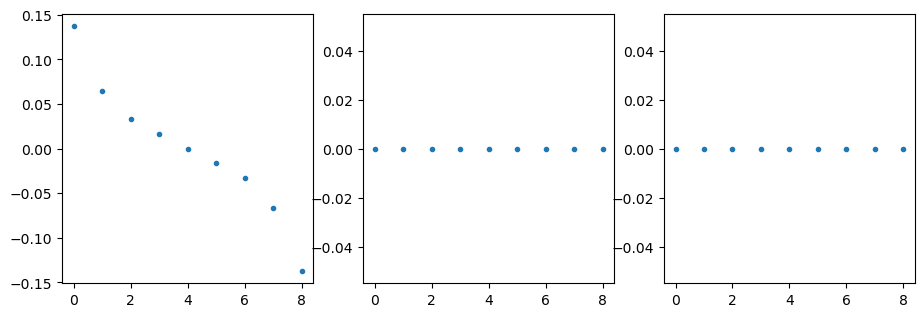

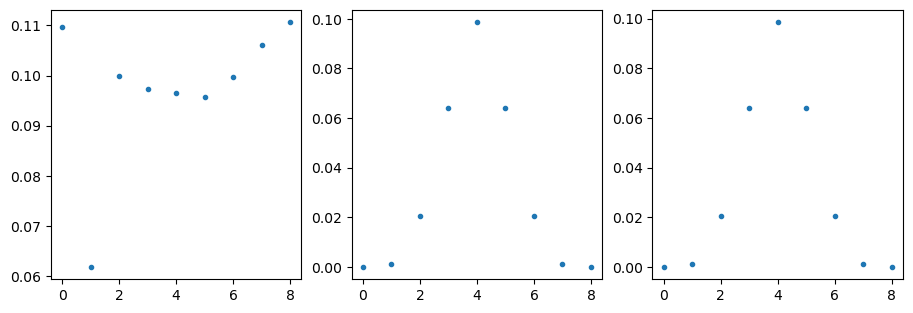

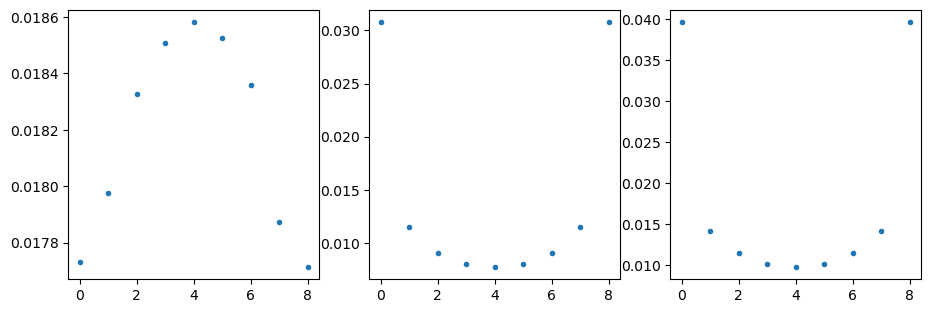

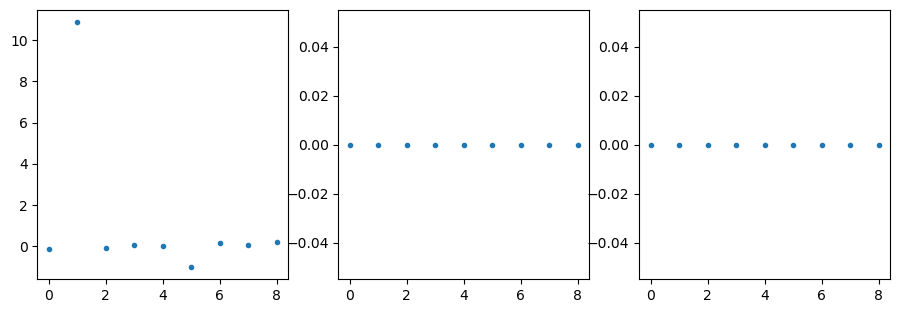

In [4]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(11, 3.5))
ax1.plot(X0x,'.')
ax2.plot(X0y,'.')
ax3.plot(X0z,'.')
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(11, 3.5))
ax1.plot(Cx,'.')
ax2.plot(Cy,'.')
ax3.plot(Cz,'.')
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(11, 3.5))
ax1.plot(Σx,'.')
ax2.plot(Σy,'.')
ax3.plot(Σz,'.')
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(11, 3.5))
ax1.plot(Ax,'.')
ax2.plot(Ay,'.')
ax3.plot(Az,'.')


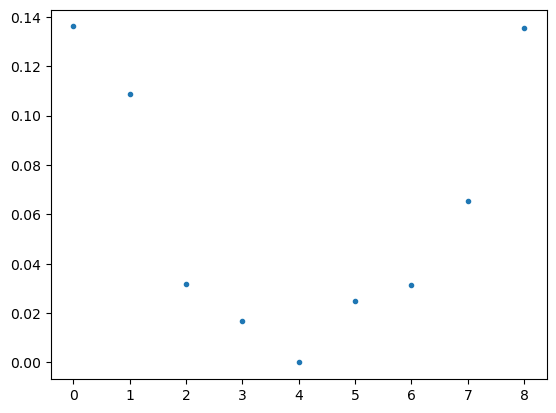

In [45]:
def valor_maximo(a,x0,σ):

    uno = -( ( 1 - a*x0 + np.sqrt( (1 + a*x0)**2 + 2*a**2*σ  ) ) / (2*a) )

    dos =    (-1 + a*x0 + np.sqrt( (1 + a*x0)**2 + 2*a**2*σ  ) ) / (2*a) 
    
    return np.min([abs(uno),abs(dos)])

maximos=[]
for i in range(len(Ax)):
    
    if i!=4:
        maximos.append(valor_maximo(Ax[i],X0x[i],Σx[i]))
    if i==4:
        maximos.append(0.0)

plt.plot(np.array(maximos),'.')

In [8]:
direccion = 'kz'
QQ = 0.0556
ϵ_plus,ψ_plus,ϵ_minus,ψ_minus = Incoherent.Reading_Data(QQ,direccion,retorno=5)

nkx=72
nky=72
nkz=72

fname = path + "BlackP_grid_nk"+str(nkx)+"x"+str(nky)+"x"+str(nkz)+"_wann_calc.h5"
Energies = Reading.ReadBands(fname)
#Energie_Valence = np.reshape(Energies[:,19],[nkx,nky,nkz])
Energie_no_Valence  = Energies[:,18]
Energie_Valence     = Energies[:,19]
Energie_Conduction  = Energies[:,20]

fname="./out_Hqpgw_new/"+str(nkx)+"x"+str(nky)+"x"+str(nkz)+"_exc.h5"
ϵ,ϕ_real,ϕ_imag =Reading.Read_Eigen_states(fname)

fname="./out_Hqpgw_new/"+str(nkx)+"x"+str(nky)+"x"+str(nkz)+"_exc_dens.h5"

ψ = Reading.Read_Density(fname)

In [9]:
#p_ex = np.array([0.0556/2,.0,.0])
p_ex = np.array([.0,.0,.0])

nuevok = 72

yp = Photo.Interpolator(nkx,nky,nkz,ψ[0,:],nuevok)

#Ψ_k_p   = Photo.SHIFTING_KplusP(nkx,nky,nkz,ψ[0,:],p_ex)
Ψ_k_p   = Photo.SHIFTING_KplusP(nuevok,nuevok,nuevok,yp,p_ex)
Ec_k_p  = Photo.SHIFTING_KplusP(nkx,nky,nkz,Energie_Conduction,p_ex)
Ev_k_p  = Photo.SHIFTING_KplusP(nkx,nky,nkz,Energie_Valence,p_ex)
Env_k_p = Photo.SHIFTING_KplusP(nkx,nky,nkz,Energie_no_Valence,p_ex)

EnergySpectrum = np.linspace(np.min(Energie_Valence)+ϵ[0]-0.01,np.max(Energie_Valence)+ϵ[0]+0.015,800)

tolerancia = 0.0005

ValueError: cannot reshape array of size 373248 into shape (48,48,48)

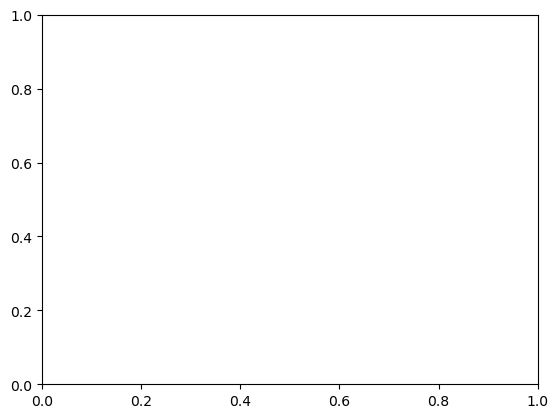

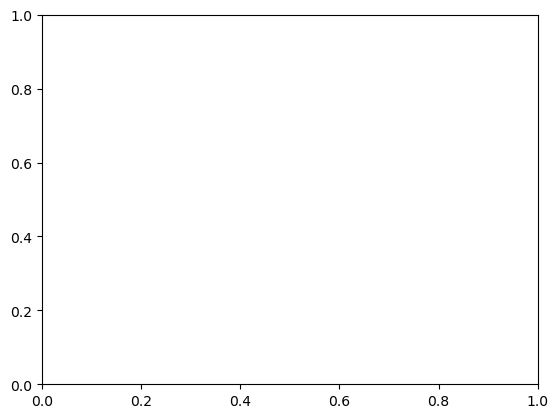

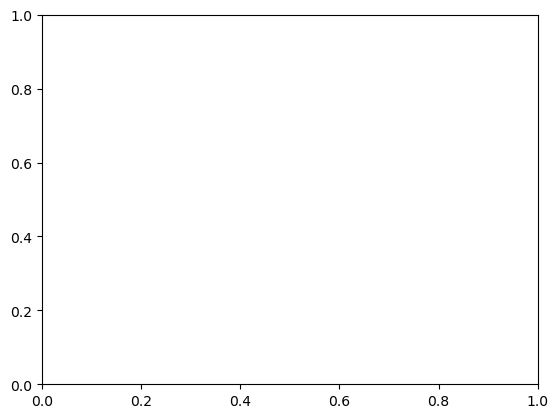

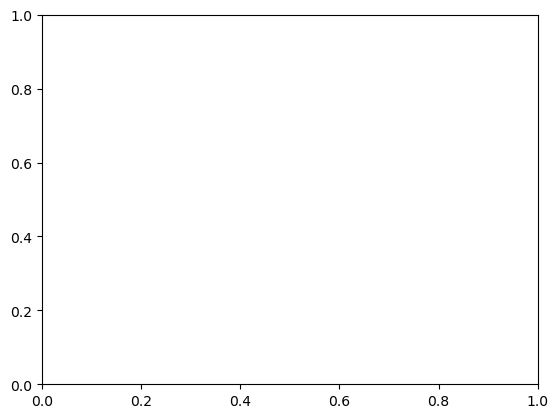

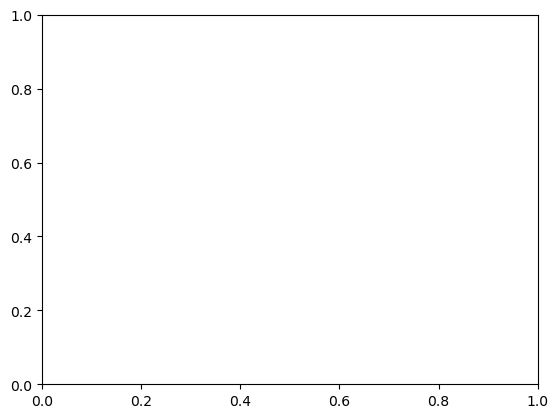

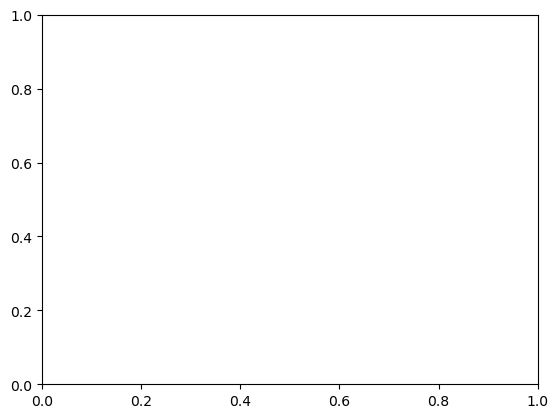

In [57]:
x1 = np.linspace(-0.5,0.5, nuevok+1)[0:-1]

fig_xy, ax_xy = plt.subplots()
fig_zy, ax_xz = plt.subplots()
fig_yz, ax_yz = plt.subplots()

fig_x, ax_x = plt.subplots()
fig_y, ax_y = plt.subplots()
fig_z, ax_z = plt.subplots()


Plotting_Exitonic_Density(x1,nuevok,nuevok,nuevok,ψ_minus,QQ,direccion)
Plotting_Exitonic_Density(x1,nuevok,nuevok,nuevok,Ψ_k_p.reshape(1,nuevok**3),QQ,direccion)
#Incoherent.Plotting_Exitonic_Density(x1,nuevok,nuevok,nuevok,ψ_minus,QQ,direccion)
#Incoherent.Plotting_Exitonic_Density(x1,nuevok,nuevok,nuevok,Ψ_k_p.reshape(1,nuevok**3),QQ,direccion)
print(np.sum(ψ_minus[0,:]))
print(np.sum(Ψ_k_p))

(-1.5, -0.4)

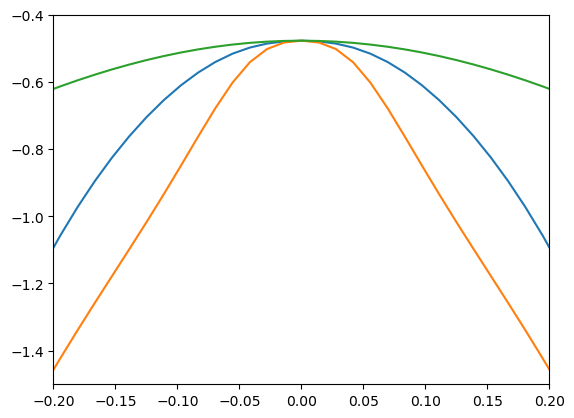

In [10]:
plt.figure()
plt.plot(x1,Ev_k_p[:,int(nuevok/2),int(nuevok/2)]*27.2)
plt.plot(x1,Ev_k_p[int(nuevok/2),:,int(nuevok/2)]*27.2)
plt.plot(x1,Ev_k_p[int(nuevok/2),int(nuevok/2),:]*27.2)
plt.xlim(-0.2,0.2)
plt.ylim(-1.5,-0.4)

In [46]:
def Plotting_Exitonic_Density(x1,nkx,nky,nkz,ψ,Qd,direccion):
    #====================================================================================
    #fig_xy, ax_xy = plt.subplots()
    #fig_zy, ax_xz = plt.subplots()
    #fig_yz, ax_yz = plt.subplots()
    #====================================================================================

    #====================================================================================
    xy = ax_xy.imshow(np.transpose(np.reshape(ψ[0,:], [nkx,nky,nkz])[:,:,int(nkz/2)]),\
                extent=[x1.min(),x1.max(),x1.min(),x1.max()],
            origin='lower',aspect='auto',interpolation ='spline36',cmap = 'PuBu')

    ax_xy.set_xlabel(r'$k_x$')
    ax_xy.set_ylabel(r'$k_y$')
    ax_xy.axvline(x=0,color='black',linestyle='--')
    ax_xy.axhline(y=0,color='black',linestyle='--')

    ax_xy.set_xlim(-0.1,0.1)
    ax_xy.set_ylim(-0.1,0.1)
    #====================================================================================

    #====================================================================================
    xz = ax_xz.imshow(np.transpose(np.reshape(ψ[0,:], [nkx,nky,nkz])[:,int(nky/2),:]),\
                extent=[x1.min(),x1.max(),x1.min(),x1.max()],
            origin='lower',aspect='auto',interpolation ='spline36',cmap = 'PuBu')

    ax_xz.set_xlabel(r'$k_x$')
    ax_xz.set_ylabel(r'$k_z$')
    ax_xz.axvline(x=0,color='black',linestyle='--')
    ax_xz.axhline(y=0,color='black',linestyle='--')

    ax_xz.set_xlim(-0.1,0.1)
    ax_xz.set_ylim(-0.1,0.1)
    #====================================================================================

    #====================================================================================
    yz = ax_yz.imshow(np.transpose(np.reshape(ψ[0,:], [nkx,nky,nkz])[int(nkx/2),:,:]),\
                extent=[x1.min(),x1.max(),x1.min(),x1.max()],
            origin='lower',aspect='auto',interpolation ='spline36',cmap = 'PuBu')

    ax_yz.set_xlabel(r'$k_y$')
    ax_yz.set_ylabel(r'$k_z$')
    ax_yz.axvline(x=0,color='black',linestyle='--')
    ax_yz.axhline(y=0,color='black',linestyle='--')
    ###ax_yz.axhline(y=Qd,color='black',linestyle=':')
    ###ax_yz.axhline(y=Qd/2,color='red',linestyle=':')
    ax_yz.set_xlim(-0.1,0.1)
    ax_yz.set_ylim(-0.1,0.1)
    #====================================================================================

    #====================================================================================
    #fig_x, ax_x = plt.subplots()
    #fig_y, ax_y = plt.subplots()
    #fig_z, ax_z = plt.subplots()
    #====================================================================================

    #====================================================================================
    #plt.plot(x1,np.reshape(ψ[0,:], [nkx,nky,nkz])[int(nkx/2),:,int(nkz/2)],'.')
    ax_x.plot(x1,np.reshape(ψ[0,:], [nkx,nky,nkz])[:,int(nky/2),int(nkz/2)],'.')
    ax_x.set_xlabel(r'$k_x$')
    ax_x.axvline(x=0.0,color='black',linestyle='--')
    ax_x.set_xlim(-0.1,0.1)
    #====================================================================================

    #====================================================================================
    #plt.plot(x1,np.reshape(ψ[0,:], [nkx,nky,nkz])[int(nkx/2),:,int(nkz/2)],'.')
    ax_y.plot(x1,np.reshape(ψ[0,:], [nkx,nky,nkz])[int(nkx/2),:,int(nkz/2)],'.')
    ax_y.set_xlabel(r'$k_y$')
    ax_y.axvline(x=0.0,color='black',linestyle='--')
    ax_y.set_xlim(-0.1,0.1)
    #====================================================================================

    #====================================================================================
    #plt.plot(x1,np.reshape(ψ[0,:], [nkx,nky,nkz])[int(nkx/2),:,int(nkz/2)],'.')
    ax_z.plot(x1,np.reshape(ψ[0,:], [nkx,nky,nkz])[int(nkx/2),int(nky/2),:],'.')
    ax_z.set_xlabel(r'$k_z$')
    ax_z.axvline(x=0.0,color='black',linestyle='--')
    ax_z.set_xlim(-0.1,0.1)
    #====================================================================================

    """if direccion =='kx':
        ax_xz.axhline(y=Qd,color='black',linestyle=':')
        ax_xz.axhline(y=Qd/2,color='red',linestyle=':')
        ax_yz.axhline(y=Qd,color='black',linestyle=':')
        ax_yz.axhline(y=Qd/2,color='red',linestyle=':')

        ax_xz.set_ylim(Qd-0.1,-Qd+0.1)
        ax_yz.set_ylim(Qd-0.1,-Qd+0.1)

        ax_z.axvline(x=Qd,color='black',linestyle=':')
        ax_z.axvline(x=Qd/2,color='red',linestyle=':')

        ax_z.set_xlim(Qd-0.1,-Qd+0.1)

    if direccion =='ky':
        ax_xy.axhline(y=-Qd,color='black',linestyle=':')
        ax_xy.axhline(y=-Qd/2,color='red',linestyle=':')
        ax_yz.axvline(x=-Qd,color='black',linestyle=':')
        ax_yz.axvline(x=-Qd/2,color='red',linestyle=':')

        ax_xy.set_ylim(Qd-0.1,-Qd+0.1)
        ax_yz.set_xlim(Qd-0.1,-Qd+0.1)

        ax_y.axvline(x=-Qd,color='black',linestyle=':')
        ax_y.axvline(x=-Qd/2,color='red',linestyle=':')

        ax_y.set_xlim(Qd-0.1,-Qd+0.1)

    if direccion =='kz':
        ax_xy.axvline(x=Qd,color='black',linestyle=':')
        ax_xy.axvline(x=Qd/2,color='red',linestyle=':')
        ax_xz.axvline(x=Qd,color='black',linestyle=':')
        ax_xz.axvline(x=Qd/2,color='red',linestyle=':')

        ax_xy.set_xlim(Qd-0.1,-Qd+0.1)
        ax_xz.set_xlim(Qd-0.1,-Qd+0.1)

        ax_x.axvline(x=Qd,color='black',linestyle=':')
        ax_x.axvline(x=Qd/2,color='red',linestyle=':')

        ax_x.set_xlim(Qd-0.1,-Qd+0.1)"""

    #plt.show()

In [35]:
from scipy.optimize import curve_fit
def func_bands_q(x, a, c, x0):
    return  a *(x-x0)**2 + c

poptx, pcovx = curve_fit( func_bands_q, x1[30:42],Ev_k_p[30:42,int(nky/2),int(nkz/2)] )
popty, pcovy = curve_fit( func_bands_q, x1[30:42],Ev_k_p[int(nkx/2),30:42,int(nkz/2)] )
poptz, pcovz = curve_fit( func_bands_q, x1[30:42],Ev_k_p[int(nkx/2),int(nky/2),30:42] )



In [36]:
poptx

array([-4.96662894e-01, -1.74908671e-02,  2.87882475e-04])

(-0.2, 0.2)

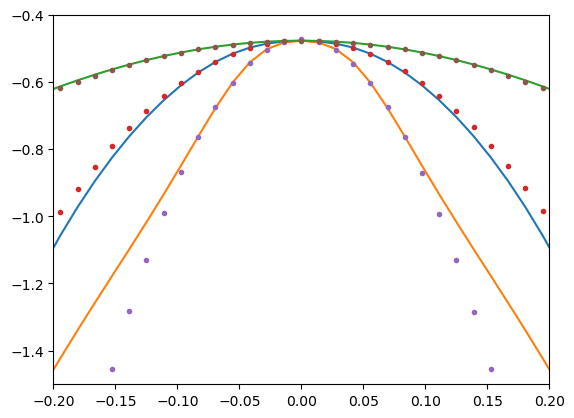

In [38]:
plt.figure()
plt.plot(x1,Ev_k_p[:,int(nuevok/2),int(nuevok/2)]*27.2)
plt.plot(x1,Ev_k_p[int(nuevok/2),:,int(nuevok/2)]*27.2)
plt.plot(x1,Ev_k_p[int(nuevok/2),int(nuevok/2),:]*27.2)

plt.plot(x1,func_bands_q(x1,*poptx)*27.2,'.')
plt.plot(x1,func_bands_q(x1,*popty)*27.2,'.')
plt.plot(x1,func_bands_q(x1,*poptz)*27.2,'.')
#plt.xlim(-0.2,0.2)
plt.ylim(-1.5,-0.4)
plt.xlim(-0.2,0.2)